In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import cartopy.crs as ccrs
import xarray as xr
pylab.rcParams['figure.figsize'] = (16., 9.)
#%matplotlib inline
from utils import constants as cnst

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [44]:
#cut_file = xr.open_dataset(cnst.CP4_PATH + '/CLOVER/CP4_18UTC_5000km2_-50_5-20N_new/1999-08-16_17:00:00_67.nc')
cut_file = xr.open_dataset(cnst.CP4_PATH + '/CLOVER/CP4_18UTC_5000km2_-50_5-20N_new/1999-08-16_17:00:00_67.nc')

In [45]:
cut_file1 = xr.open_dataset('/home/ck/DIR/cornkle/MCSfiles/WA5000_4-20N_12W-12E_-50_afternoon_GPM/2004-04-07_20:00:00_4.nc')

In [46]:
cut_file1

<xarray.Dataset>
Dimensions:  (x: 114, y: 105)
Coordinates:
    lon      (x, y) float64 ...
    lat      (x, y) float64 ...
    time     datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    p        (x, y) float64 ...
    t_lag0   (x, y) float64 ...
    tc_lag0  (x, y) float64 ...
Attributes:
    lag0:       0
    meanT:      -67.5995111174134
    T90perc:    -56.0
    meanT_cut:  -67.6637103130672
    area:       2411
    area_cut:   2401

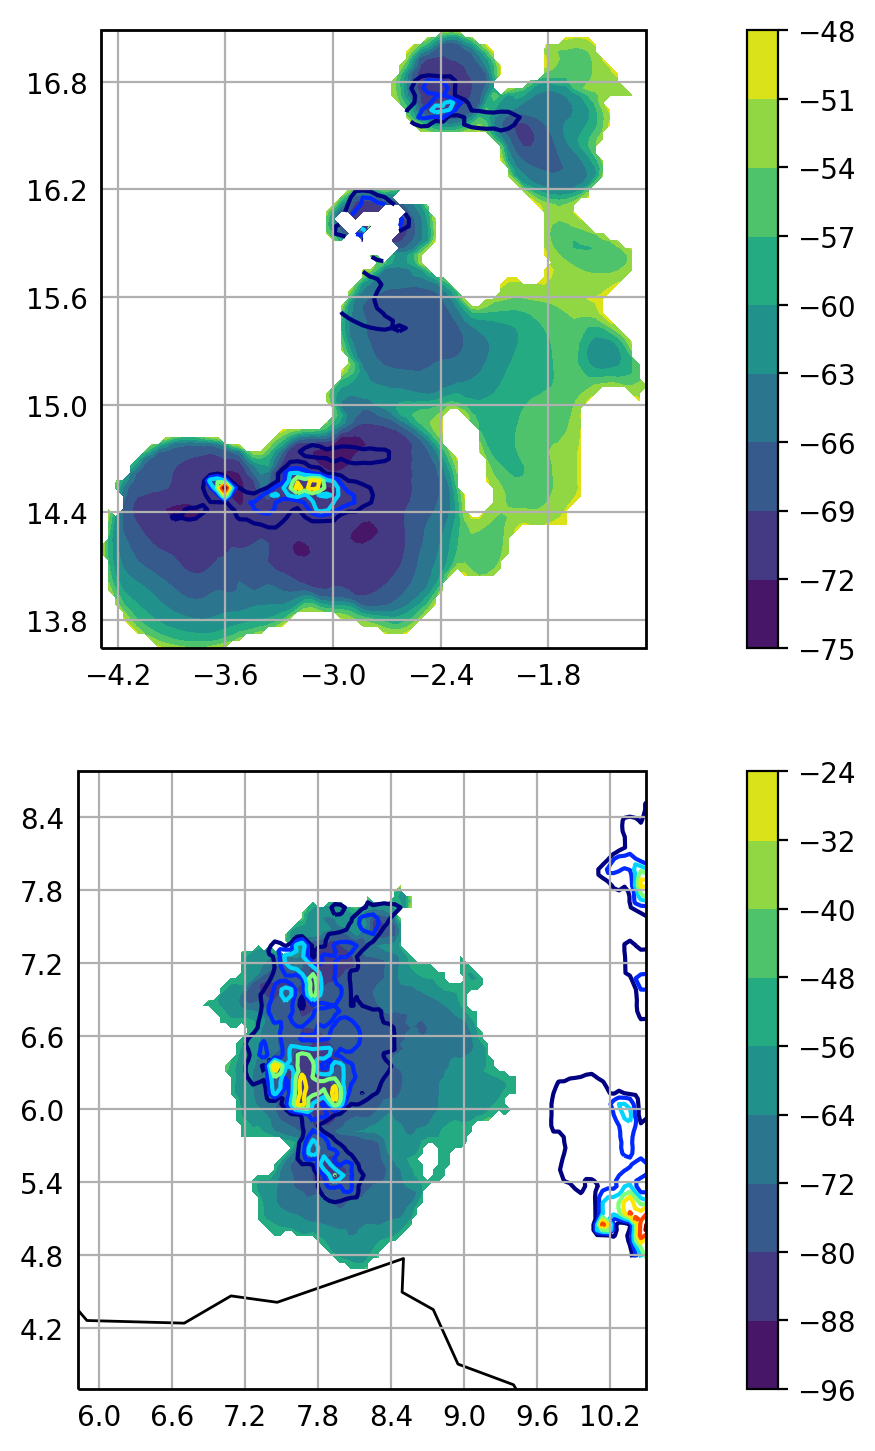

In [47]:
f = plt.figure(figsize=(13,9), dpi=200)
ax =  f.add_subplot(211, projection=ccrs.PlateCarree())
mapp = ax.contourf(cut_file.longitude, cut_file.latitude, cut_file['lw_out_PBLtop'], transform=ccrs.PlateCarree())
plt.colorbar(mapp)
ax.contour(cut_file.longitude, cut_file.latitude,cut_file['lsRain'], cmap='jet', transform=ccrs.PlateCarree())
ax.coastlines()   ## adds coastlines
# Gridlines
xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
xl.xlabels_top = False   ## labels off
xl.ylabels_right = False
ax =  f.add_subplot(212, projection=ccrs.PlateCarree())
mapp = ax.contourf(cut_file1.lon, cut_file1.lat, cut_file1['tc_lag0'], transform=ccrs.PlateCarree())
plt.colorbar(mapp)
ax.contour(cut_file1.lon, cut_file1.lat,cut_file1['p'], cmap='jet', transform=ccrs.PlateCarree())
ax.coastlines()   ## adds coastlines
# Gridlines
xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
xl.xlabels_top = False   ## labels off
xl.ylabels_right = False

In [48]:
lwout_file = xr.open_dataset(cnst.CP4_PATH + '/CLOVER/CP4hist/lw_out_PBLtop/lw_out_PBLtop_fullPL_A1hr_mean_ag057_4km_199903220030-199903222330.nc')

In [49]:
lsrain = xr.open_dataset(cnst.CP4_PATH + '/CLOVER/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199903220030-199903222330.nc')

In [192]:
lw = lwout_file['lw_out_PBLtop'][lwout_file['time.hour']==18].squeeze()
rain = lsrain['lsRain'][lsrain['time.hour']==18].squeeze()

In [193]:
lwsmall= lw.sel(latitude=slice(6,9), longitude=slice(0,3))
rain= rain.sel(latitude=slice(6,9), longitude=slice(0,3))

In [194]:
lwsmall

<xarray.DataArray 'lw_out_PBLtop' (latitude: 74, longitude: 74)>
array([[-1538, -1512, -1460, ...,  -830,  -829,  -838],
       [-1480, -1433, -1359, ...,  -818,  -814,  -820],
       [-1427, -1372, -1278, ...,  -808,  -805,  -807],
       ...,
       [-1210, -1489, -1811, ...,  -796,  -826,  -843],
       [-1284, -1654, -1981, ...,  -799,  -826,  -833],
       [-1290, -1652, -2014, ...,  -810,  -838,  -851]])
Coordinates:
    time                     datetime64[ns] 1999-03-22T18:30:00
  * latitude                 (latitude) float32 6.0112495 6.05175 ... 8.967751
  * longitude                (longitude) float32 0.022735596 ... 2.979248
    forecast_period          timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...
Attributes:
    standard_name:    toa_outgoing_longwave_flux
    units:            W m-2
    um_stash_source:  m01s03i332
    um_runid:         ag057
    um_streamid:      apa
    um_version:       10.3
    cell_methods:     time: mean (interval: 1 hour)
    

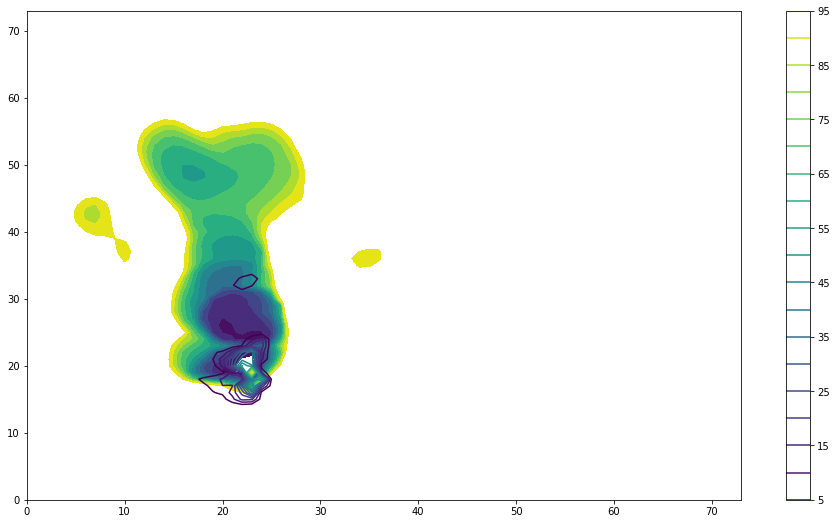

In [196]:
plt.contourf(lwsmall/100, levels=np.arange(-75,-50,2))
plt.contour(rain*3600, levels=np.arange(5,100,5))
plt.colorbar()